  <tr>
        <td width="15%">
        </td>
        <td>
            <div align="left">
                <font size=25px>
                    <b>Travel Review Clustering
                    </b>
                </font>
            </div>
        </td>
    </tr>

## Context:
This data set is populated by capturing user ratings from Google reviews. Reviews on attractions from 24 categories across Europe are considered. Google user rating ranges from 1 to 5 and average user rating per category is calculated.

<a id='import_packages'></a>
## 1. Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set default setting of seaborn
sns.set()


<a id='Read_Data'></a>
## 2. Read the Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>Read the data using read_csv() function from pandas<br> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# read the data
raw_data = pd.read_csv('/naman/pgads/google_review_ratings.csv')

# print the first five rows of the data
raw_data.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


<a id='Data_Types'></a>
## 3. Data Types and Dimensions

In [17]:
# check the data types for variables
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

<table align='left'>
    <tr>
        <td width='8%'>
            <img src='note.png'>
        </td>
        <td>
            <div align='left', style='font-size:120%'>
                    <b>Features that are named as Categories, so we need to rename category with it respective label. Also We will drop 'Unnamed: 25' feature as it is redundant</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Before manipulation of data, let's check dimension of dataset**

In [18]:
# get the shape
print(raw_data.shape)

(5456, 26)


**We see that dataframe has 5456 instances and 26 features**

<a id='Data_Manipulation'></a>
## 4. Data Manipulation
Here we will change features names and remove redundant feature

**Droping redundant feature**

In [10]:
# Using drop() function to remove redundant feature
data = raw_data.drop(['Unnamed: 25'] ,axis = 1)
data.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


**Renaming features**

To perform the action we will create list containing actual names of features

In [11]:
column_names = ['user_id', 'churches', 'resorts', 'beaches', 'parks', 
                'theatres', 'museums', 'malls', 'zoo', 'restaurants', 
                'pubs_bars', 'local_services', 'burger_pizza_shops', 
                'hotels_other_lodgings', 'juice_bars', 'art_galleries', 
                'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 
                'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens']


Applying above columns names to dataframe columns

In [12]:
data.columns = column_names

Checking if changes are applied or not

In [13]:
data.head()

,user_id,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


Columns are renamed

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                5456 non-null   object 
 1   churches               5456 non-null   float64
 2   resorts                5456 non-null   float64
 3   beaches                5456 non-null   float64
 4   parks                  5456 non-null   float64
 5   theatres               5456 non-null   float64
 6   museums                5456 non-null   float64
 7   malls                  5456 non-null   float64
 8   zoo                    5456 non-null   float64
 9   restaurants            5456 non-null   float64
 10  pubs_bars              5456 non-null   float64
 11  local_services         5456 non-null   object 
 12  burger_pizza_shops     5455 non-null   float64
 13  hotels_other_lodgings  5456 non-null   float64
 14  juice_bars             5456 non-null   float64
 15  art_

<table align='left'>
    <tr>
        <td width='8%'>
            <img src='note.png'>
        </td>
        <td>
            <div align='left', style='font-size:120%'>
                    <b>Since local_services is numeric, it is represented as categorical</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Changing data type of local_services**

In [15]:
data['local_services'] = pd.to_numeric(data['local_services'],errors = 'coerce')

<table align='left'>
    <tr>
        <td width='8%'>
            <img src='note.png'>
        </td>
        <td>
            <div align='left', style='font-size:120%'>
                    <b>We have encountered an error specifying that features have a invalid string. So to change data type we need to release this error</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
data['local_services'].unique() # Getting all unique values

array([1.7 , 1.73, 1.71, 1.69, 1.67, 1.65, 1.66, 1.64, 1.63, 5.  , 1.56,
       1.55, 1.53, 1.52, 1.51, 1.5 , 1.49, 1.48, 1.46, 2.13, 2.12, 2.1 ,
       2.09, 2.08, 2.07, 2.06, 2.05, 2.04, 2.03, 2.01, 2.  , 1.98, 1.97,
       1.95, 1.93, 1.91, 1.9 , 1.88, 1.86, 1.84, 1.83, 1.81, 1.79, 1.77,
       1.74, 1.72, 1.68, 1.61, 1.6 , 1.59, 1.58, 1.99, 2.47, 2.35, 2.48,
       2.59, 3.39, 2.31, 2.78, 2.79, 2.77, 2.76, 2.75, 2.74, 2.72, 2.71,
       2.69, 2.68, 2.66, 2.65, 2.63, 2.61, 2.57, 2.55, 2.53, 2.51, 2.49,
       1.94, 1.92, 1.82, 1.76, 1.62, 4.08, 4.04, 4.02, 4.01, 4.  , 3.99,
       3.98, 3.96, 3.95, 3.94, 3.93, 3.91, 3.9 , 3.88, 3.87, 3.86, 3.84,
       3.85, 2.17, 3.  , 2.99, 2.82, 2.83, 2.81, 2.8 , 2.73, 2.67, 2.64,
       2.62, 2.54, 2.52, 2.5 , 2.02, 1.57, 1.54, 1.47, 1.87, 1.85, 1.78,
       2.6 , 1.45, 1.43, 1.41, 1.39, 1.37, 1.36, 1.34, 1.32, 1.3 , 1.28,
       1.26, 1.24, 1.22, 1.2 , 1.18, 1.16, 1.14, 1.12, 1.1 , 1.08, 1.07,
       1.05, 1.03, 1.01, 0.99, 0.97, 0.96, 0.94, 0.

<table align='left'>
    <tr>
        <td width='8%'>
            <img src='note.png'>
        </td>
        <td>
            <div align='left', style='font-size:120%'>
                    <b>There is a data as '2\t2.' which cannot be converted to float. So need to remove it</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Drop rows where local_services is equal to '2\t2.'**

In [17]:
# Get row number where local services is invalid
data[data['local_services'] == '2\t2.']['local_services']

Series([], Name: local_services, dtype: float64)

Droping row 2712

In [18]:
data = data.drop(data[data['local_services'] == '2\t2.'].index)

Now, we can changing data type of local_services

In [19]:
data[['local_services']] = data[['local_services']].apply(pd.to_numeric) 

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                5456 non-null   object 
 1   churches               5456 non-null   float64
 2   resorts                5456 non-null   float64
 3   beaches                5456 non-null   float64
 4   parks                  5456 non-null   float64
 5   theatres               5456 non-null   float64
 6   museums                5456 non-null   float64
 7   malls                  5456 non-null   float64
 8   zoo                    5456 non-null   float64
 9   restaurants            5456 non-null   float64
 10  pubs_bars              5456 non-null   float64
 11  local_services         5455 non-null   float64
 12  burger_pizza_shops     5455 non-null   float64
 13  hotels_other_lodgings  5456 non-null   float64
 14  juice_bars             5456 non-null   float64
 15  art_

All the features are numeric except the user_id as it is categorical in nature 

In [21]:
data_manipulated = data.copy(deep =True ) # Creating a copy of dataframe

<a id='Statistical_Summary'></a>
## 5. Statistical Summary


In [22]:
# data frame with numerical features
data_manipulated.describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%), minimum, and maximum values, along with the standard deviation.</b>     </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# data frame with categorical features
data.describe(include='object')

,user_id
count,5456
unique,5456
top,User 1
freq,1


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>user_id is unique for all instances</b>     </font>
            </div>
        </td>
    </tr>
</table>

<a id='Handling_Missing_Values'></a>
## 6. Handling Missing Values
If the missing values are not handled properly we may end up drawing an inaccurate inference about the data. Due to improper handling, the result obtained will differ from the ones where the missing values are present.

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>In order to get the count of missing values in each column, we use the in-built function .isnull().sum()
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
# get the count of missing values
missing_values = data_manipulated.isnull().sum()

# print the count of missing values
print(missing_values)

user_id                  0
churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs_bars                0
local_services           1
burger_pizza_shops       1
hotels_other_lodgings    0
juice_bars               0
art_galleries            0
dance_clubs              0
swimming_pools           0
gyms                     0
bakeries                 0
beauty_spas              0
cafes                    0
view_points              0
monuments                0
gardens                  1
dtype: int64


<table align='left'>
    <tr>
        <td width='8%'>
            <img src='note.png'>
        </td>
        <td>
            <div align='left', style='font-size:120%'>
                    <b>There is only one missing value, so rplacing it with mean</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
data_no_missing = data_manipulated.fillna(data_manipulated.mean())

C:\Users\COSMOS\AppData\Local\Temp\ipykernel_7408\3154654579.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_no_missing = data_manipulated.fillna(data_manipulated.mean())


In [26]:
# Rechecking missing values
missing_values = data_no_missing.isnull().sum()

# print the count of missing values
print(missing_values)

user_id                  0
churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs_bars                0
local_services           0
burger_pizza_shops       0
hotels_other_lodgings    0
juice_bars               0
art_galleries            0
dance_clubs              0
swimming_pools           0
gyms                     0
bakeries                 0
beauty_spas              0
cafes                    0
view_points              0
monuments                0
gardens                  0
dtype: int64


There are no missing values present in the data.

<a id='Exploratory_Data_Analysis'></a>
## 7. Exploratory Data Analysis


**PDF's of features**

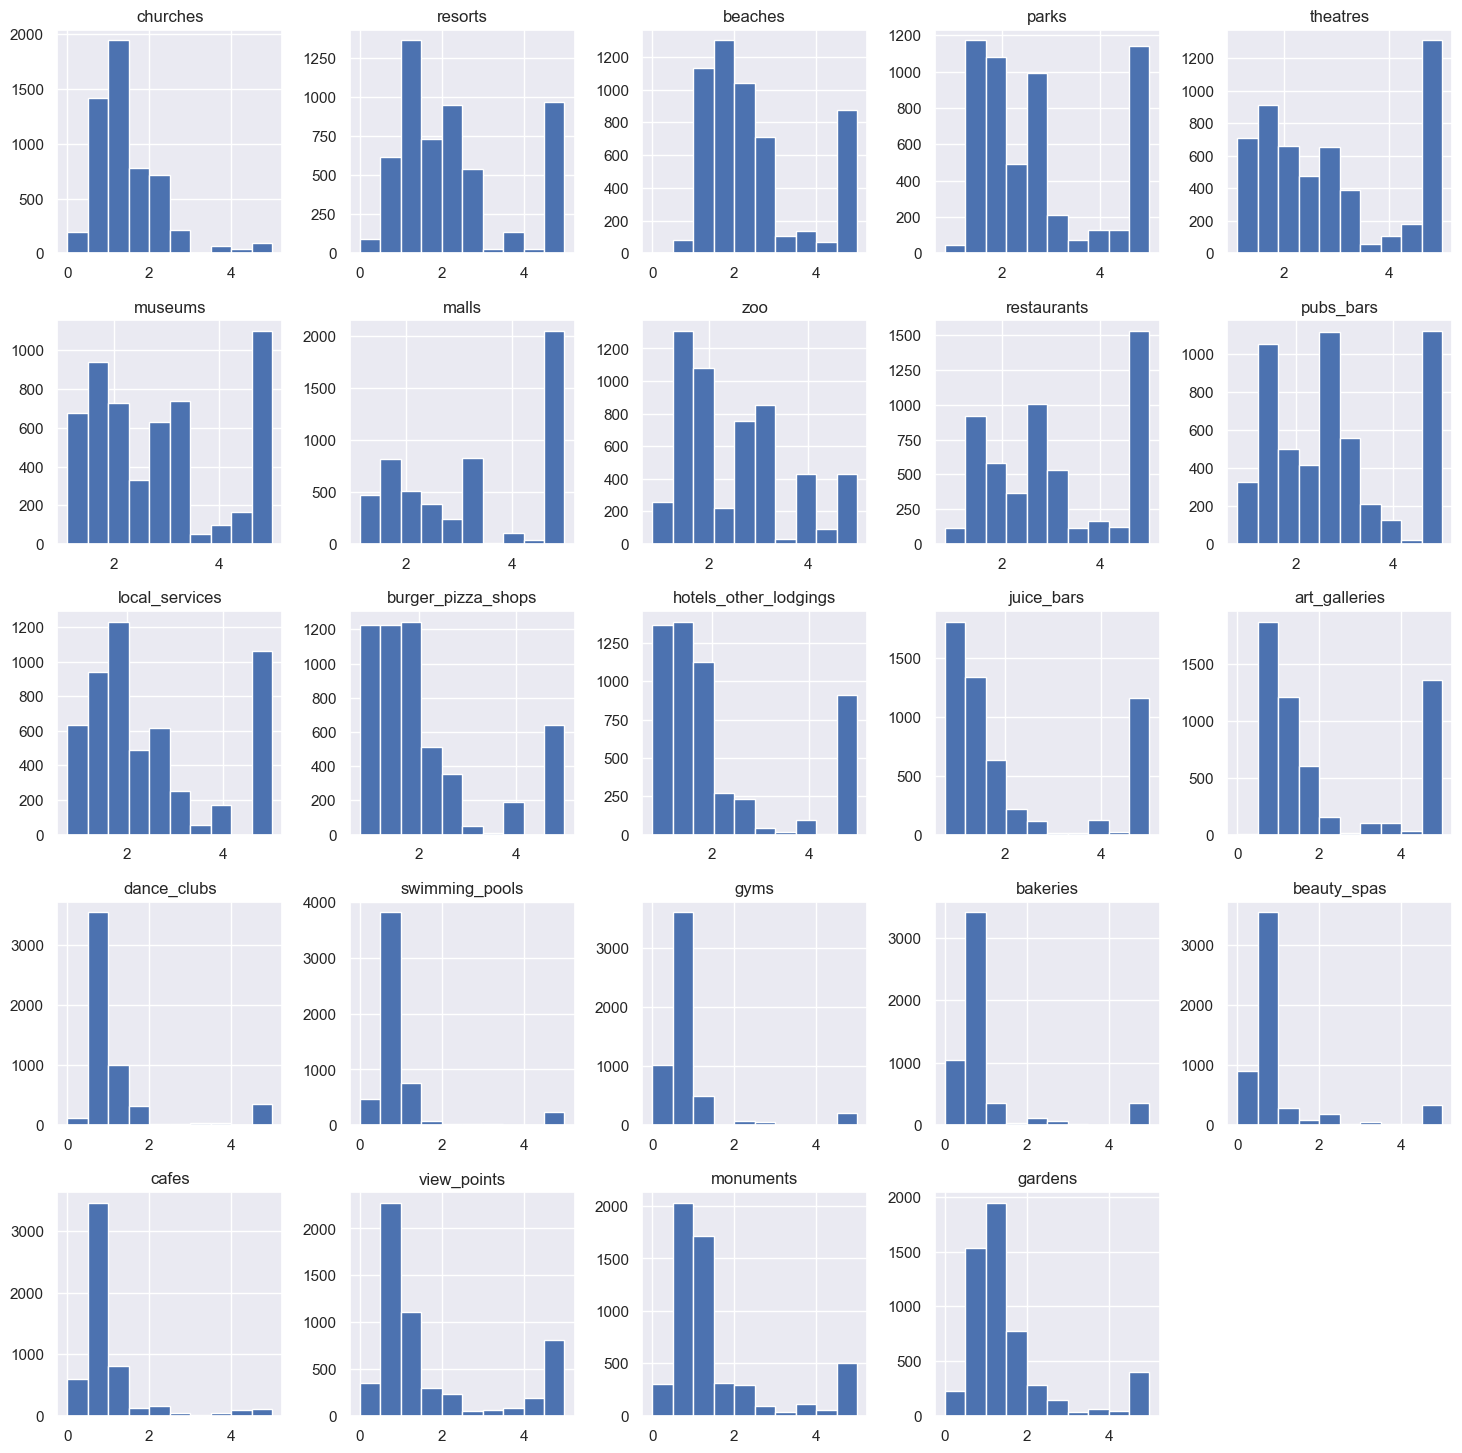

In [27]:
fig = data_no_missing.hist(figsize = (18,18))


**Lets check if users have rated all the features**

In [28]:
data_description = data_no_missing.describe() 
rated = data_description.loc['min'] > 0
rated[rated]


parks                    True
theatres                 True
museums                  True
malls                    True
zoo                      True
restaurants              True
pubs_bars                True
local_services           True
burger_pizza_shops       True
hotels_other_lodgings    True
juice_bars               True
Name: min, dtype: bool

<table align='left'>
    <tr>
        <td width='8%'>
            <img src='note.png'>
        </td>
        <td>
            <div align='left', style='font-size:120%'>
                    <b>The above 11 features have been given a rating by all the users as the minimum value is greater than 0
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Visualizing number of reviews for each category

In [29]:
# Creating the dataframe containg number of review for each feature
reviews = data_no_missing[column_names[1:]].astype(bool).sum(axis=0).sort_values()
reviews

bakeries                 4410
gyms                     4439
beauty_spas              4560
cafes                    4852
swimming_pools           4977
view_points              5111
monuments                5154
gardens                  5231
churches                 5261
dance_clubs              5344
resorts                  5366
art_galleries            5452
beaches                  5452
pubs_bars                5456
local_services           5456
zoo                      5456
hotels_other_lodgings    5456
juice_bars               5456
malls                    5456
museums                  5456
theatres                 5456
parks                    5456
restaurants              5456
burger_pizza_shops       5456
dtype: int64

In [30]:
column_names = data_no_missing.columns.values

Text(0.5, 1.0, 'No of reviews under each category')

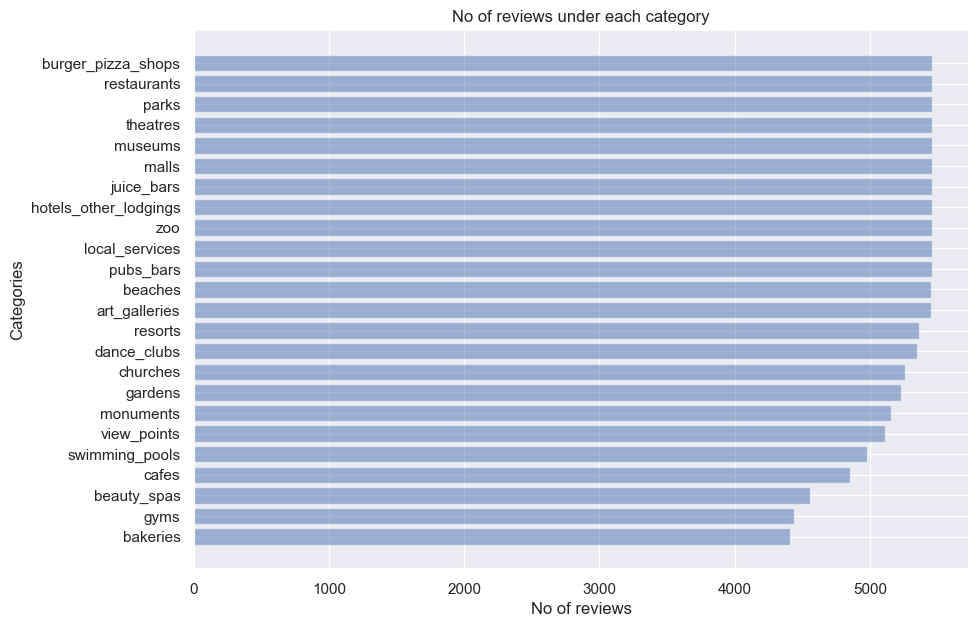

In [31]:
plt.figure(figsize=(10,7))
plt.barh(np.arange(len(column_names[1:])), reviews.values, align='center', alpha=0.5)
plt.yticks(np.arange(len(column_names[1:])), reviews.index)
plt.xlabel('No of reviews')
plt.ylabel('Categories')
plt.title('No of reviews under each category')

**Now let's check how many users have given reviews to the features**

In [32]:
# Creating a dataframe to store number of reviews by users
no_of_reviews = data_no_missing[column_names[1:]].astype(bool).sum(axis=1).value_counts()
no_of_reviews

24    3725
23     505
21     457
20     243
22     167
19     148
18     114
17      69
16      22
15       6
dtype: int64

Text(0.5, 1.0, 'No of Categories vs No of reviews')

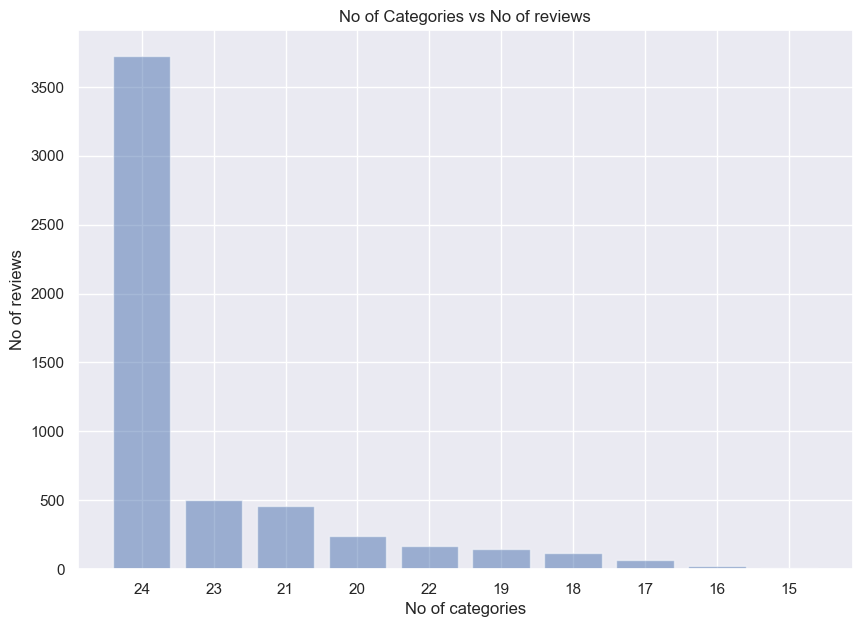

In [33]:
# Plotting the number of customers vs numbe of review
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(no_of_reviews)), no_of_reviews.values, align='center', alpha=0.5)
plt.xticks(np.arange(len(no_of_reviews)), no_of_reviews.index)
plt.ylabel('No of reviews')
plt.xlabel('No of categories')
plt.title('No of Categories vs No of reviews')

**Conclusion**

Around 3500 users have given a rating for all the 24 categories and the least no of rating given by a user is 15. So for users with lesser number of ratings a recommender system can be built

**Now let's check Average rating per feature**

In [34]:
# Creating a dataframe to store average rating for each feature
avg_rating = data_no_missing[column_names[1:]].mean() # average rating is calculated by dividing count by it's mean
avg_rating = avg_rating.sort_values() # sorting the rating in increasing order
avg_rating

gyms                     0.822414
swimming_pools           0.949203
cafes                    0.965838
bakeries                 0.969811
beauty_spas              1.000071
dance_clubs              1.192801
churches                 1.455720
monuments                1.531453
gardens                  1.560755
view_points              1.750537
burger_pizza_shops       2.078339
hotels_other_lodgings    2.125511
juice_bars               2.190861
art_galleries            2.206573
resorts                  2.319707
beaches                  2.489331
zoo                      2.540795
local_services           2.550071
parks                    2.796886
pubs_bars                2.832729
museums                  2.893490
theatres                 2.958941
restaurants              3.126019
malls                    3.351395
dtype: float64

Text(0.5, 1.0, 'Average rating per Category')

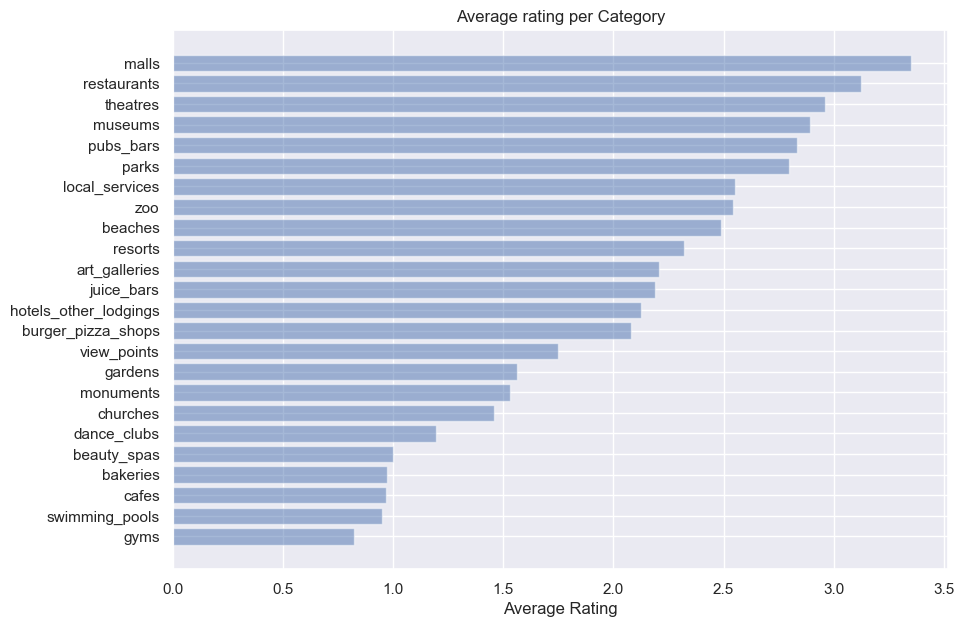

In [35]:
# Plotting average rating plots
plt.figure(figsize=(10,7))
plt.barh(np.arange(len(column_names[1:])), avg_rating.values, align='center', alpha=0.5)
plt.yticks(np.arange(len(column_names[1:])), avg_rating.index)
plt.xlabel('Average Rating')
plt.title('Average rating per Category')

Creating a id column

In [36]:
data_1 = data_no_missing.copy()

new = data_1['user_id'].str.split(' ',n=2,expand=True)
data_1['user'] = new[0]
data_1['id'] = new[1]
data_1 = data_1.drop(['user_id','user'],axis=1)
data_1.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,id
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,4
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,5


In [37]:
data_final = data_1.copy(deep = True)
data_final.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,id
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,4
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,5


<a id='Hierarchical_Clustering'></a>
## 8. Hierarchical Clustering

**import relevant packages**

In [42]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import scale as s
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score

In [44]:
siliuette_list_hierarchical = []

for cluster in range(2,15,1):
    for linkage_method in ['single','average', 'complete', 'ward']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, metric = 'euclidean', n_clusters=cluster).fit_predict(data_final)
        sil_score = metrics.silhouette_score(data_final, agglomerative, metric='euclidean')
        siliuette_list_hierarchical.append((cluster, sil_score, linkage_method, len(set(agglomerative)) ) )
        
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns=['clusters', 'sil_score','linkage_method', 'number_of_clusters'])

In [45]:
df_hierarchical.sort_values('sil_score', ascending=False)

,clusters,sil_score,linkage_method,number_of_clusters
2,2,0.618810,complete,2
1,2,0.603627,average,2
3,2,0.591956,ward,2
0,2,0.573018,single,2
6,3,0.569354,complete,3
7,3,0.569099,ward,3
9,4,0.556327,average,4
5,3,0.551604,average,3
10,4,0.551384,complete,4
11,4,0.550482,ward,4


In [46]:
hierarchical_= AgglomerativeClustering(linkage='complete', affinity='euclidean', n_clusters=2).fit_predict(data_final)

C:\Users\COSMOS\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [47]:
data_final['Segments'] = hierarchical_

In [48]:
data_final

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,id,Segments
0,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,1,0
1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,...,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,2,0
2,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,3,0
3,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,...,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,4,0
4,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,...,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,5452,1
5452,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,...,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,5453,1
5453,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,...,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,5454,1
5454,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,...,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12,5455,1


In [50]:
data_final.replace({'Segments':1}, 'Positive', inplace=True)
data_final.replace({'Segments':0}, 'Negative', inplace=True)

In [51]:
data_final['Segments'].value_counts()

Negative    3033
Positive    2423
Name: Segments, dtype: int64